# The nationality of the lawyers on DBpedia

In [10]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
import scipy.stats
from collections import Counter
from operator import itemgetter

In [11]:
query = """

PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>

SELECT DISTINCT ?Person ?name ?nationality

WHERE
        {?Person a dbo:Person .
        ?Person foaf:name ?name .
        ?Person dbo:nationality ?nationality1 .
        ?Person dbp:birthDate ?Birth_Date .
        ?Person dbo:abstract ?abstract .
        
        FILTER ( CONTAINS(?abstract, "jurist") || CONTAINS(?abstract, "lawyer") )
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)    
        
        
        BIND(STRAFTER(STR(?nationality1),"http://dbpedia.org/resource/") AS ?nationality2)
        BIND(REPLACE(STR(?nationality2),"[_]"," ") AS ?nationality3)
        BIND(REPLACE(STR(?nationality3),"United States of America", "United States") AS ?nationality4)
        BIND(REPLACE(STR(?nationality4),"Americans", "United States") AS ?nationality5)
        BIND(REPLACE(STR(?nationality5),"American people", "United States") AS ?nationality6)
        BIND(REPLACE(STR(?nationality6),"United States nationality", "United States") AS ?nationality)


        }
"""

In [12]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql")

In [13]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [14]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [15]:
# Number of rows in the result
len(rc['results']['bindings'])

2935

In [16]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/A._Brown_Moore'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Andre Brown Moore'}, 'nationality': {'type': 'literal', 'value': 'United States'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/A._P._Mda'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Ashby Solomzi Peter Mda'}, 'nationality': {'type': 'literal', 'value': 'South Africa'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Loyal_B._Stearns'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Loyal B. Stearns'}, 'nationality': {'type': 'literal', 'value': 'United States'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Lubomir_Dymsha'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Dymsha Lubomir. Deputy of the 4th Duma, 1913'}, 'nationality': {'type': 'literal', 'value': 'Poles'}}
{'Person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Lucien_Cooremans'}, 'name':

In [17]:
# Explore
nationalityList = []
for l in rc['results']['bindings']:
    nationalityList.append(l['nationality']['value'])

In [30]:
#Count the nationalies
counterNationalityList= Counter(nationalityList)
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())), reverse=False)
groupedNationalityList

[(1, 'Albanians'),
 (1, 'Algerian people'),
 (1, 'American Samoa'),
 (1, 'American nationality law'),
 (1, 'Andorra'),
 (1, 'Arbëreshë people'),
 (1, 'Armenia'),
 (1, 'Asgardia'),
 (1, 'Austrian Empire'),
 (1, 'Barbados'),
 (1, 'Belgian'),
 (1, 'Belgian people'),
 (1, 'Belgians'),
 (1, 'Bengalis in Pakistan'),
 (1, 'Benin'),
 (1, 'Bosnia and Herzegovina'),
 (1, 'Bosniak'),
 (1, 'Brazilians'),
 (1, 'British Ceylon'),
 (1, 'British People'),
 (1, 'British Raj'),
 (1, 'British Royal Family'),
 (1, 'British Subject'),
 (1, 'British Virgin Islands'),
 (1, 'British citizenship'),
 (1, 'British nationality'),
 (1, 'British-American'),
 (1, 'Bulgarian language'),
 (1, 'Bulgarians'),
 (1, 'Burma'),
 (1, 'Cape Verdean people'),
 (1, 'Catalonia'),
 (1, 'Ceylon'),
 (1, 'Cherokee'),
 (1, 'Chilean nationality law'),
 (1, 'Chileans'),
 (1, 'Chinese language'),
 (1, 'Citizenship in the United States'),
 (1, 'Costa Ricans'),
 (1, 'Czech people'),
 (1, 'Democratic Republic of the Congo'),
 (1, 'Demograp

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


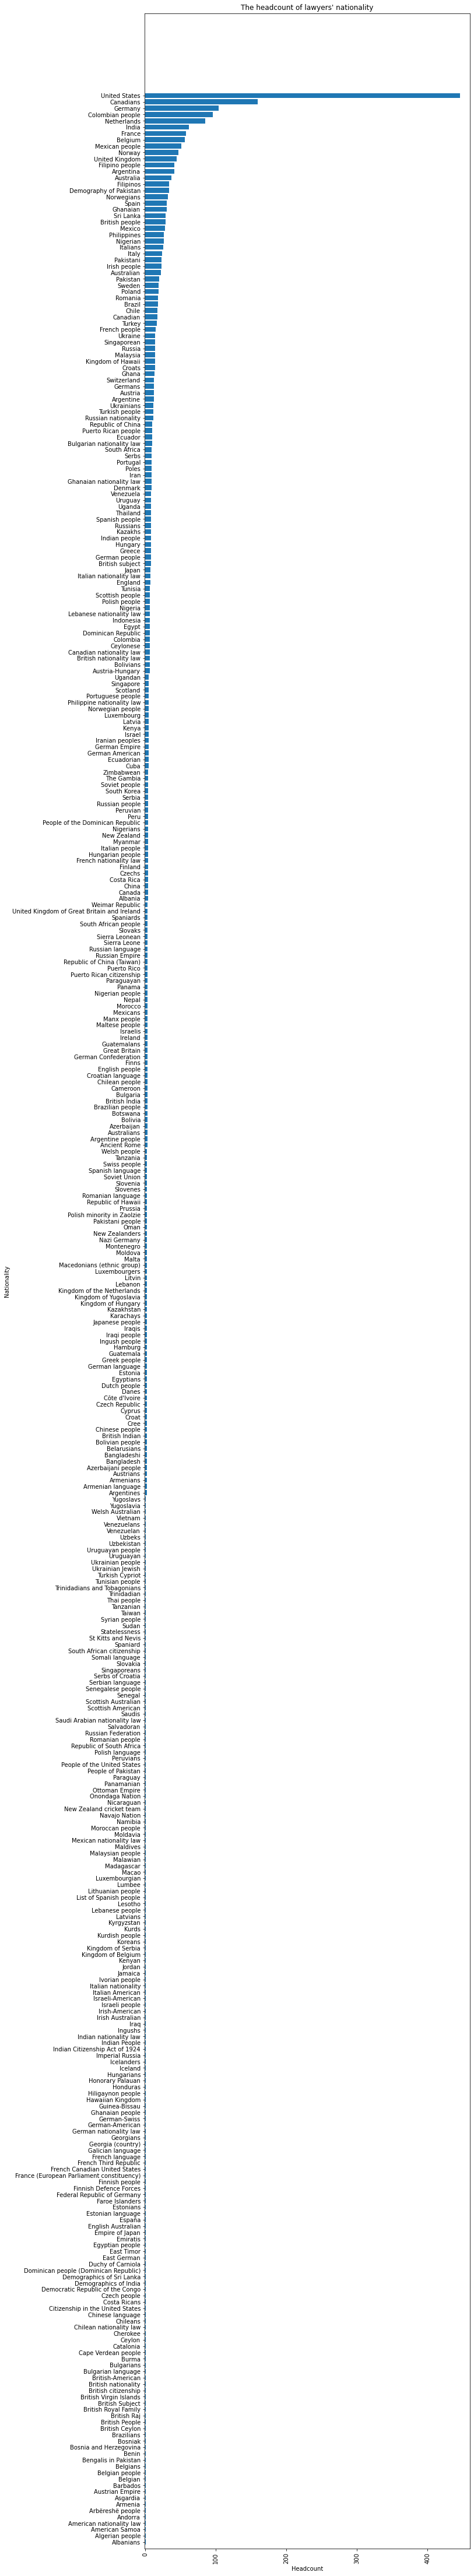

In [26]:
# Barplot
eff = [l[1] for l in groupedNationalityList]
objects = [l[0] for l in groupedNationalityList]

p1 = plt.barh(eff, objects)

plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("The headcount of lawyers' nationality")
plt.gcf().set_size_inches(10, 80)
plt.xticks(rotation=45)

p1 = plt.figure(1, [100, 230])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,460)
ax.set_ylim(-1,400)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [27]:
counterNationalityList= Counter(nationalityList)
groupedNationalityList = sorted(list(zip(counterNationalityList.values(), counterNationalityList.keys())), reverse=True)

In [28]:
bGNL=(groupedNationalityList[0:30])

/home/sylvain/anaconda3/envs/Github/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


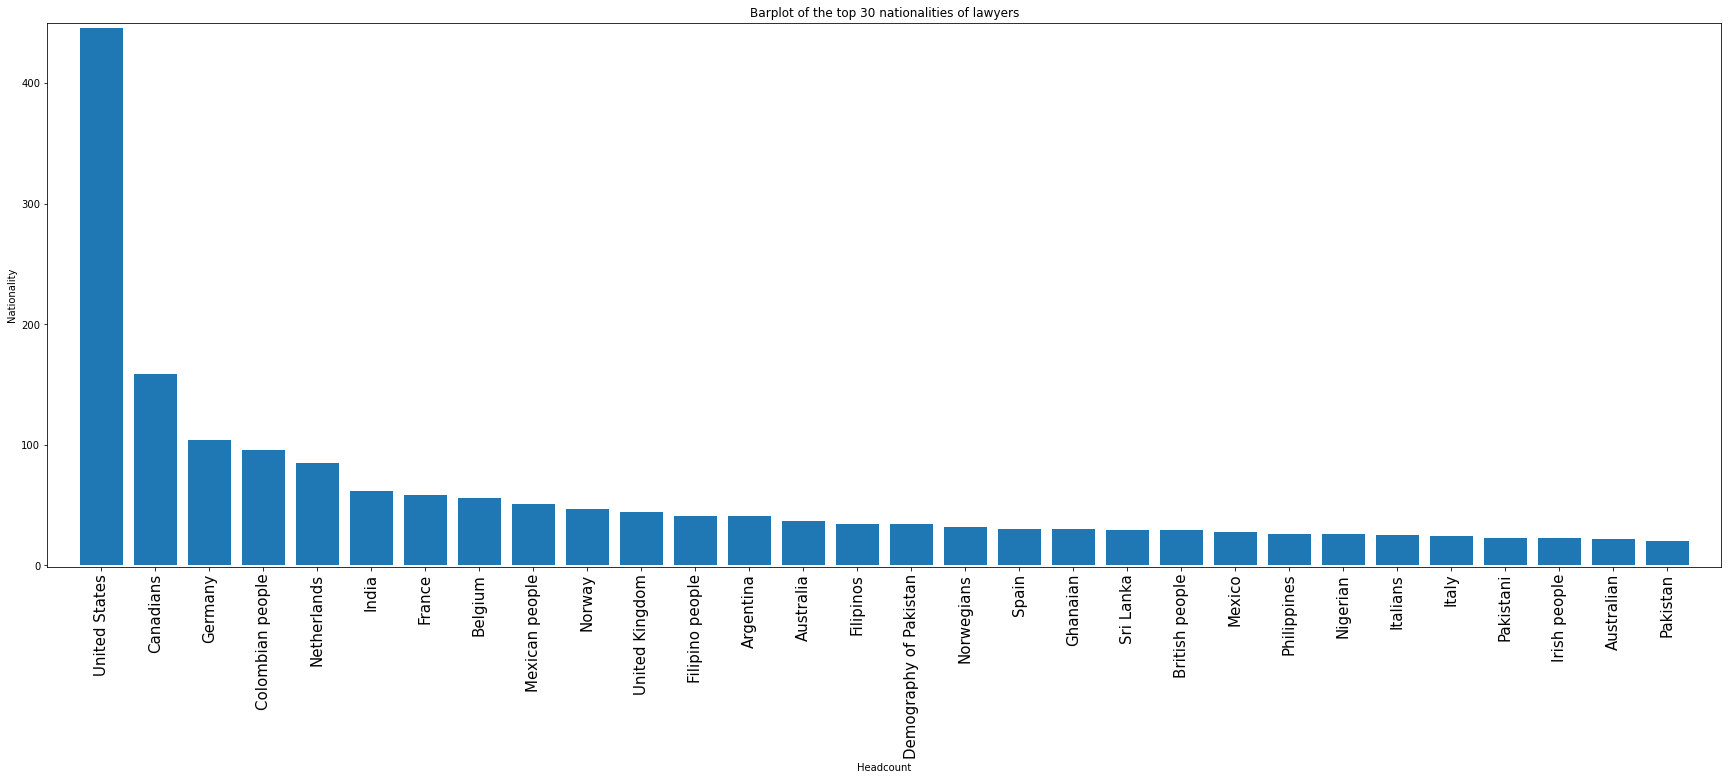

In [29]:
# Barplot of the top 30 nationalities of economists
eff = [l[1] for l in bGNL]
objects = [l[0] for l in bGNL]

p1 = plt.bar(eff, objects)

plt.xlabel('Headcount')
plt.ylabel('Nationality')
plt.title("Barplot of the top 30 nationalities of lawyers")
plt.gcf().set_size_inches(30, 10)
plt.xticks(rotation=45)

p1 = plt.figure(1, [20, 30])
ax = p1.add_subplot(111)
# Set the x-axis limit
ax.set_xlim(-1,30)
ax.set_ylim(-1,450)
# Change of fontsize and angle of xticklabels
plt.setp(ax.get_xticklabels(), fontsize=15, rotation='vertical')
plt.show()

